In [3]:
import pandas as pd

traindata = pd.read_csv('2d_samples_4cl_train.csv', header=0)

# Trainingsdaten
X = traindata.iloc[:, [0, 1]].values
y = traindata.iloc[:, [2]].values.ravel()

testdata = pd.read_csv('2d_samples_4cl_test.csv', header=0)

# Testdaten
X_test = testdata.iloc[:, [0, 1]].values
y_test = testdata.iloc[:, [2]].values.ravel()

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
forest.fit(X,y)

y_pred = forest.predict(X_test)
result = confusion_matrix(y_test,y_pred)
print(result)

acc = accuracy_score(y_test,y_pred)
print(acc)

[[990   8   0   2]
 [ 18 481   1   0]
 [  0   1 247   2]
 [  2   0   3 245]]
0.9815


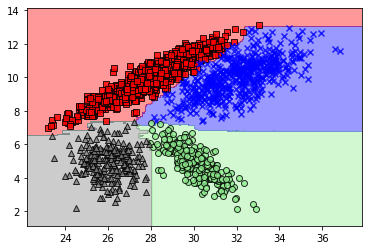

In [6]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # transform labels into numbers
    le = preprocessing.LabelEncoder()
    le.fit(y)

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = le.transform(Z)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
        
plot_decision_regions(X_test,y_pred,forest)